#### Q : Retrieve all stock items that contain the word "T-LIGHT" in their description.
~~~
SELECT 
    *
FROM
    aiml_sql.sales s
WHERE
    s.Description LIKE '%T-LIGHT%';
~~~


#### Calculate the total quantity sold per StockCode.
~~~
SELECT 
    s.StockCode AS "Stock Code",
    SUM(s.Quantity) AS 'Total Quantity'
FROM
    aiml_sql.sales s
GROUP BY s.StockCode;
~~~


#### Question: Find total revenue (Quantity × UnitPrice) per CustomerID.
~~~
SELECT 
    s.CustomerID AS "Customer ID",
    ROUND(SUM(s.Quantity * s.UnitPrice), 2) AS "Total Revenue"
FROM
    aiml_sql.sales s
GROUP BY s.CustomerID;
~~~


#### Question: Get a list of all invoices and count of distinct stock items per invoice.
~~~
SELECT 
    s.InvoiceNo AS "Invoices",
    COUNT(DISTINCT (s.StockCode)) AS "Distinct Stock Items"
FROM
    aiml_sql.sales s
GROUP BY s.InvoiceNo;
~~~


#### Question: Perform an inner join between sales and stock details to display full item names along with total revenue per item.
~~~
SELECT 
    sd.StockCode AS "Stock Code",
    sd.Description AS "Stock Description",
    ROUND(SUM(s.Quantity * s.UnitPrice), 2) AS "Total Revenue"
FROM
    aiml_sql.stockdetails sd
        INNER JOIN
    aiml_sql.sales s ON sd.StockCode = s.StockCode
        AND sd.Description = s.Description
GROUP BY sd.Description , sd.StockCode;
~~~

In [28]:
def check_missing_dup_dtype_report(file_name,report_type):
    import pandas as pd
    df=pd.read_csv(file_name)
    if report_type != "MISSING_VALUES" and  report_type != "DUPLICATE_VALUES" and report_type != "DATA_TYPES":
        print("ERROR: Invalid Input!!")
    else:
        print("*+*"*15 + " " + report_type + " REPORT " + "*+*"*15 )
        if report_type == "MISSING_VALUES":
            print(df.isnull().sum())
        elif report_type == "DUPLICATE_VALUES":
            print(f"There are around {df.duplicated().sum()} duplicate records")
            print(df[df.duplicated()])
        elif report_type == "DATA_TYPES":
            print(df.info()) 
    print()


check_missing_dup_dtype_report("sales.csv","MISSING_VALUES")
check_missing_dup_dtype_report("sales.csv","DUPLICATE_VALUES")
check_missing_dup_dtype_report("sales.csv","DATA_TYPES")

check_missing_dup_dtype_report("StockDetails.csv","MISSING_VALUES")
check_missing_dup_dtype_report("StockDetails.csv","DUPLICATE_VALUES")
check_missing_dup_dtype_report("StockDetails.csv","DATA_TYPES")



*+**+**+**+**+**+**+**+**+**+**+**+**+**+**+* MISSING_VALUES REPORT *+**+**+**+**+**+**+**+**+**+**+**+**+**+**+*
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

*+**+**+**+**+**+**+**+**+**+**+**+**+**+**+* DUPLICATE_VALUES REPORT *+**+**+**+**+**+**+**+**+**+**+**+**+**+**+*
There are around 15 duplicate records
     InvoiceNo StockCode                          Description  Quantity  \
292     538174     22326  ROUND SNACK BOXES SET OF4 WOODLAND         12   
1132    542106     20676                   RED RETROSPOT BOWL        24   
3232    553731     23208        LUNCH BAG VINTAGE LEAF DESIGN        10   
3626    555162     22704                     WRAP RED APPLES         25   
3744    555383     21828               EIGHT PIECE SNAKE  SET         2   
3748    555383     22668                    PINK BABY BUNTING         5   
5969    565430     22375    AIRLINE BAG VINTAGE JET SET B

In [36]:
print(df)

     InvoiceNo StockCode                          Description  Quantity  \
0       536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1       536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
2       536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
3       536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
4       536527     22244           3 HOOK HANGER MAGIC GARDEN        12   
...        ...       ...                                  ...       ...   
9490    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
9491    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
9492    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
9493    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
9494    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

           InvoiceDate  UnitPrice  CustomerID  Country  
0     01-12-2010 13:04       2.95       12

In [82]:
import pandas as pd
df=pd.read_csv("sales.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='mixed')
df['hours']=df['InvoiceDate'].dt.hour
df['minutes']=df['InvoiceDate'].dt.minute
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hours,minutes
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-01-12 13:04:00,2.95,12662,Germany,13,4
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-01-12 13:04:00,2.55,12662,Germany,13,4
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-01-12 13:04:00,0.85,12662,Germany,13,4
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-01-12 13:04:00,1.65,12662,Germany,13,4
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-01-12 13:04:00,1.95,12662,Germany,13,4
...,...,...,...,...,...,...,...,...,...,...
9490,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-09-12 12:16:00,1.25,12713,Germany,12,16
9491,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-09-12 12:16:00,0.85,12713,Germany,12,16
9492,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-09-12 12:16:00,0.85,12713,Germany,12,16
9493,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-09-12 12:16:00,2.08,12713,Germany,12,16


In [83]:
import pandas as pd
import numpy as np
df=pd.read_csv("sales.csv")
df['TotalPrice']=np.round(df['Quantity']*df['UnitPrice'],2)
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,01-12-2010 13:04,2.95,12662,Germany,17.70
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,01-12-2010 13:04,2.55,12662,Germany,15.30
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,01-12-2010 13:04,0.85,12662,Germany,10.20
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,01-12-2010 13:04,1.65,12662,Germany,19.80
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,01-12-2010 13:04,1.95,12662,Germany,23.40
...,...,...,...,...,...,...,...,...,...
9490,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,09-12-2011 12:16,1.25,12713,Germany,15.00
9491,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,09-12-2011 12:16,0.85,12713,Germany,10.20
9492,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,09-12-2011 12:16,0.85,12713,Germany,10.20
9493,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,09-12-2011 12:16,2.08,12713,Germany,24.96


In [101]:
import pandas as pd
df=pd.read_csv("sales.csv")

# df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

df[df['Description']=="POSTAGE"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14,536527,POST,POSTAGE,1,01-12-2010 13:04,18.0,12662,Germany
40,536840,POST,POSTAGE,1,02-12-2010 18:27,18.0,12738,Germany
50,536861,POST,POSTAGE,3,03-12-2010 10:44,18.0,12427,Germany
51,536967,POST,POSTAGE,1,03-12-2010 12:57,18.0,12600,Germany
61,536983,POST,POSTAGE,1,03-12-2010 14:30,18.0,12712,Germany
...,...,...,...,...,...,...,...,...
9399,581266,POST,POSTAGE,5,08-12-2011 11:25,18.0,12621,Germany
9430,581494,POST,POSTAGE,2,09-12-2011 10:13,18.0,12518,Germany
9443,581570,POST,POSTAGE,1,09-12-2011 11:59,18.0,12662,Germany
9456,581574,POST,POSTAGE,2,09-12-2011 12:09,18.0,12526,Germany


In [102]:
import pandas as pd
df=pd.read_csv("sales.csv")

df.groupby(['CustomerID'])['Quantity'].sum().sort_values(ascending=False)[:3]
# import pandas as pd

# # Sample DataFrame with invoice data
# data = {
#     'Invoice_ID': [101, 102, 103, 104, 105, 106],
#     'Customer_ID': ['C1', 'C2', 'C1', 'C3', 'C2', 'C3'],
#     'Quantity': [10, 5, 7, 8, 3, 6]
# }

# df = pd.DataFrame(data)

# # Find the number of unique customers
# unique_customers = df['Customer_ID'].nunique()

# # Compute the average quantity per invoice
# average_quantity_per_invoice = df.groupby('Invoice_ID')['Quantity'].sum().mean()

# print(f"Unique customers: {unique_customers}")
# print(f"Average quantity per invoice: {average_quantity_per_invoice:.2f}")

array([12662, 12472, 12471, 12738, 12427, 12600, 12712, 12647, 12720,
       12708, 12474, 12709, 12481, 12621, 12649, 12605, 12476, 12705,
       12668, 13817, 12585, 12530, 12501, 12480, 12500, 12524, 12601,
       12665, 12626, 12673, 12527, 12559, 12693, 12625, 13815, 12609,
       12645, 12468, 12528, 12477, 12561, 12654, 12633, 12614, 12623,
       12520, 12613, 12619, 12569, 12580, 12701, 13811, 12622, 12592,
       12590, 12710, 12426, 12473, 12517, 12516, 12635, 12648, 12560,
       12521, 12627, 13814, 13813, 12534, 12644, 12518, 12642, 13812,
       12492, 14335, 12526, 12566, 12497, 12612, 12703, 12628, 13816,
       12519, 12498, 13810, 12475, 12572, 12522, 12581, 12504, 12603,
       12702, 12658, 12531, 12479, 12713])

In [145]:
# import pandas as pd
# df=pd.read_csv('sales.csv')
# # df.groupby(['InvoiceNo'])['Quantity'].mean()
# # df_new=df.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean()
# df_new=df.groupby(['InvoiceNo'])['Quantity'].mean()
# # df_new.to_csv("abc.csv")
# # np.size(df['CustomerID'].unique())
# df_new
# # df_new[df_new['CustomerID']== 12427]




import pandas as pd
import numpy as np
df=pd.read_csv("sales.csv")

## Separate Unique customer and Average unit per Invoice solution 
print(f"Number of unique CustomerID is {np.size(df['CustomerID'].unique())}")
print()
print(df.groupby(['InvoiceNo'])['Quantity'].mean())
print()

## Average unit per Invoice solution against each CustomerID 
print(df.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean())


Number of unique CustomerID is 95

InvoiceNo
536527     10.466667
536840     13.454545
536861      7.900000
536967     15.500000
536983      6.666667
             ...    
C580313    -3.000000
C580714    -3.000000
C580740   -14.000000
C580989    -1.000000
C581409    -1.769231
Name: Quantity, Length: 603, dtype: float64

CustomerID  InvoiceNo
12426       554985        8.600000
12427       536861        7.900000
            570452        7.600000
            577135       56.666667
            C539866      -3.000000
                           ...    
13816       C576229      -3.000000
13817       539946        7.000000
            575713        9.866667
14335       565430        8.095238
            578273        1.857143
Name: Quantity, Length: 603, dtype: float64


<Axes: title={'center': 'Top 10 items by Quantity Sold'}, xlabel='Description'>

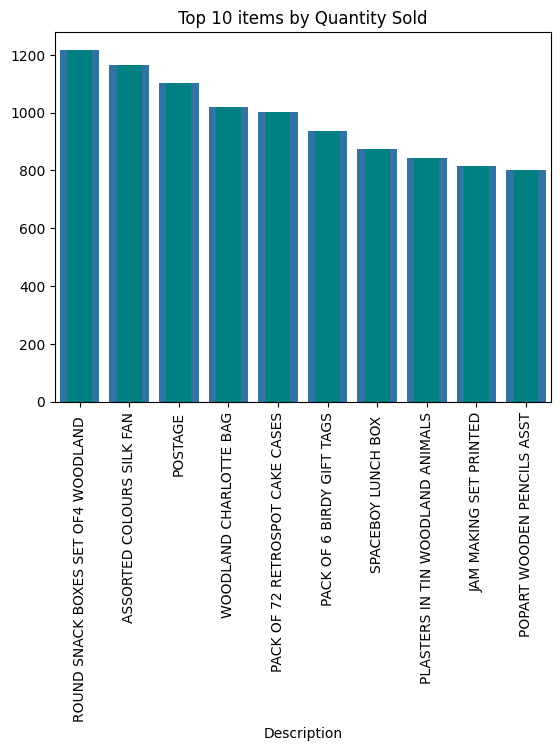

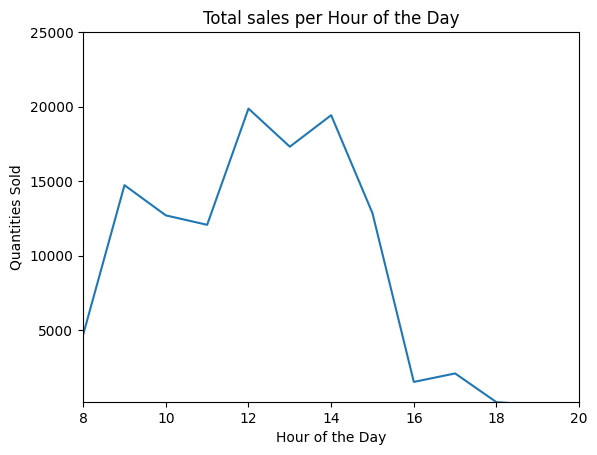

In [181]:
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv("sales.csv")
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='mixed')
df['Hour']=df['InvoiceDate'].dt.hour
df_hourly_sales=df.groupby('Hour')['Quantity'].agg('sum')
sb.lineplot(data=pd.DataFrame(df_hourly_sales.index,df_hourly_sales.values),x=df_hourly_sales.index,y=df_hourly_sales.values)
plt.title("Total sales per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Quantities Sold")
plt.xlim((8,20))
plt.ylim((200,25000))
plt.show()


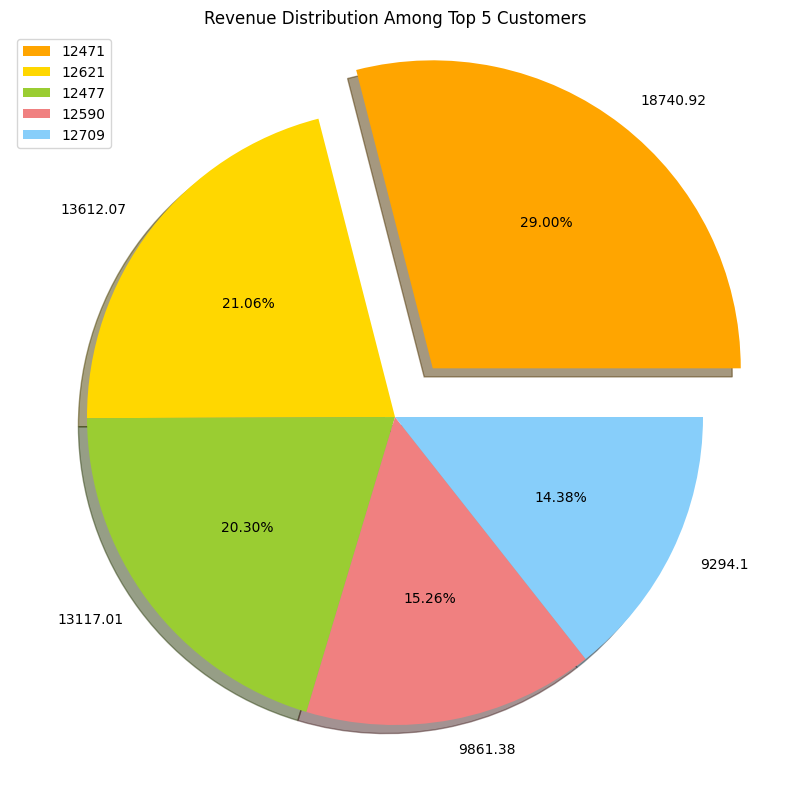

In [ ]:
# revenue distribution among top 5 customers

from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

colors=['orange','gold','yellowgreen','lightcoral','lightskyblue']
explode=(0.2,0,0,0,0)


df=pd.read_csv("sales.csv")
df['Revenue']=np.round(df['Quantity']*df['UnitPrice'],2)
df=df.groupby("CustomerID")["Revenue"].agg("sum").sort_values(ascending=False)[:5]

plt.figure(figsize=(14,10))
plt.pie(df.values,labels=df.values,colors=colors,autopct='%1.2f%%',explode=explode,shadow=True)
plt.title("Revenue Distribution Among Top 5 Customers")
plt.legend(df.index)
plt.show()

Month
1     16584.10
2      8384.23
3     14024.24
4     15534.95
5     18240.34
6     14237.32
7     25168.48
8     20122.26
9     15516.52
10    22557.30
11    29844.55
12    21483.92
Name: Revenue, dtype: float64


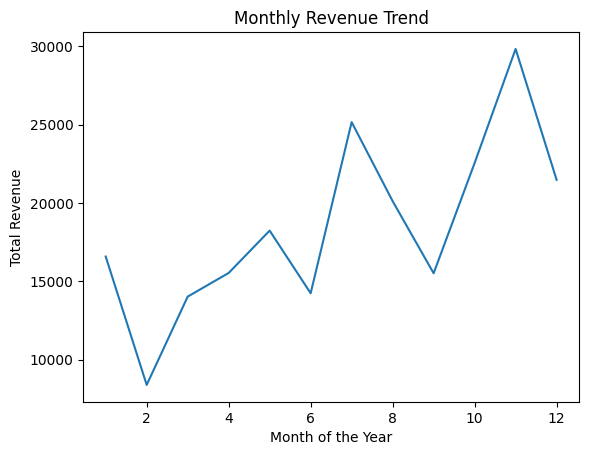

In [ ]:
## Monthly Revenue Trend

import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df=pd.read_csv("sales.csv")
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='mixed')
df['Month']=df['InvoiceDate'].dt.month
df['Revenue']=np.round(df['Quantity']*df['UnitPrice'],2)
df_monthly_revenue_trend=df.groupby('Month')['Revenue'].agg('sum')

sb.lineplot(data=pd.DataFrame(df_monthly_revenue_trend.index,df_monthly_revenue_trend.values),x=df_monthly_revenue_trend.index,y=df_monthly_revenue_trend.values)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month of the Year")
plt.ylabel("Total Revenue")
plt.show()

In [225]:
# ## top 5 invoices by revenue, showing contribution from each item

import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df=pd.read_csv("sales.csv")

df['Revenue']=np.round(df['Quantity']*df['UnitPrice'],2)

df.sort_values(by=['Revenue'],ascending=False,inplace=True)
df
# df_monthly_revenue_trend=df.groupby('Month')['Revenue'].agg('sum')

# sb.lineplot(data=pd.DataFrame(df_monthly_revenue_trend.index,df_monthly_revenue_trend.values),x=df_monthly_revenue_trend.index,y=df_monthly_revenue_trend.values)

# plt.title("Monthly Revenue Trend")
# plt.xlabel("Month of the Year")
# plt.ylabel("Total Revenue")
# plt.show()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
6769,569640,22423,REGENCY CAKESTAND 3 TIER,80,05-10-2011 12:25,10.95,12471,Germany,876.00
9292,581179,22423,REGENCY CAKESTAND 3 TIER,64,07-12-2011 15:43,10.95,12471,Germany,700.80
7817,572134,23427,STOOL HOME SWEET HOME,60,21-10-2011 10:13,10.40,12500,Germany,624.00
8685,577168,22423,REGENCY CAKESTAND 3 TIER,56,18-11-2011 10:42,10.95,12603,Germany,613.20
7329,571223,M,Manual,1,14-10-2011 13:36,599.50,13810,Germany,599.50
...,...,...,...,...,...,...,...,...,...
477,C539644,22423,REGENCY CAKESTAND 3 TIER,-21,20-12-2010 15:52,10.95,12471,Germany,-229.95
4343,C558897,M,Manual,-1,04-07-2011 15:55,389.68,12619,Germany,-389.68
8157,C575635,M,Manual,-1,10-11-2011 13:45,424.06,12473,Germany,-424.06
8158,C575635,M,Manual,-1,10-11-2011 13:45,549.34,12473,Germany,-549.34


In [229]:
import pandas as pd

# Sample DataFrame
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A'],
        'Values': [10, 20, 10, 30, 20, 50, 40, 30, 60, 50]}
df = pd.DataFrame(data)

# Get top 5 unique values from 'Values' column
top_5_values = df['Values'].nlargest(5)

print(top_5_values)

# 8    60
# 5    50
# 6    40
# 3    30
# 1    20

8    60
5    50
9    50
6    40
3    30
Name: Values, dtype: int64
